In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [2]:
from fastai.vision.all import *
from fastai.distributed import *
import torch
import torch.nn as nn
import torchvision
from torchvision import models
import torchvision.transforms as transforms

In [3]:
cifar_stats

([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])

In [4]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

trainset = torchvision.datasets.CIFAR100(
    root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=256, shuffle=True, num_workers=8)

testset = torchvision.datasets.CIFAR100(
    root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=256, shuffle=False, num_workers=8)

dls = DataLoaders(trainloader, testloader)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
model = models.vgg16_bn(pretrained=False)

In [6]:
model.classifier[-1] = nn.Linear(in_features=4096, out_features=100)
model = model.cuda()

In [7]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy, cbs=[CudaCallback, SaveModelCallback(monitor='accuracy')])
learn.model = learn.model.cuda()

SuggestedLRs(lr_min=0.0009120108559727668, lr_steep=0.02754228748381138)

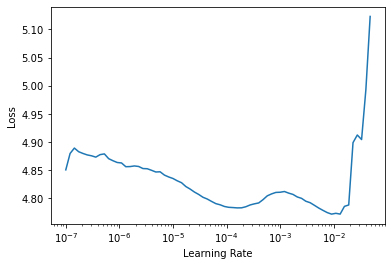

In [8]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(240, .001798)

epoch,train_loss,valid_loss,accuracy,time
0,4.333339,4.135894,0.067300,00:18
1,3.960786,3.785294,0.138000,00:18
2,3.779689,3.607606,0.173100,00:18
3,3.628493,3.449169,0.212800,00:18
4,3.504032,3.345172,0.243200,00:18
5,3.384556,3.199354,0.275000,00:18
6,3.285114,3.137472,0.289000,00:18
7,3.196257,3.041897,0.317200,00:18
8,3.121338,2.990297,0.335400,00:18
9,3.024545,2.948562,0.345400,00:18


Better model found at epoch 0 with accuracy value: 0.06729999929666519.
Better model found at epoch 1 with accuracy value: 0.1379999965429306.
Better model found at epoch 2 with accuracy value: 0.17309999465942383.
Better model found at epoch 3 with accuracy value: 0.21279999613761902.
Better model found at epoch 4 with accuracy value: 0.24320000410079956.
Better model found at epoch 5 with accuracy value: 0.2750000059604645.
Better model found at epoch 6 with accuracy value: 0.289000004529953.
Better model found at epoch 7 with accuracy value: 0.3172000050544739.
Better model found at epoch 8 with accuracy value: 0.3353999853134155.
Better model found at epoch 9 with accuracy value: 0.34540000557899475.
Better model found at epoch 10 with accuracy value: 0.36410000920295715.
Better model found at epoch 11 with accuracy value: 0.3772999942302704.
Better model found at epoch 14 with accuracy value: 0.4059999883174896.
Better model found at epoch 15 with accuracy value: 0.430799990892410

In [ ]:
learn.validate()

In [ ]:
path = '../models/baseline/cifar100/'

try:
    os.mkdir(path)
except OSError as error:
    print(error)